<a href="https://colab.research.google.com/github/TheAmirHK/Quantum_Computation/blob/main/Multi_qubit_gates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install qiskit, qiskit_ibm_runtime, pylatexenc, qiskit

In [16]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector, array_to_latex, plot_histogram
from math import pi
%matplotlib inline

In [17]:
def plot_bloch(circuit_name):
  simulator = Aer.get_backend('statevector_simulator')
  result = execute(circuit_name, backend=simulator).result()
  statevector = result.get_statevector()
  return plot_bloch_multivector(result.get_statevector())

def state_vector(circuit_name):
  simulator = Aer.get_backend('statevector_simulator')
  result = execute(circuit_name, backend=simulator).result()
  statevector = result.get_statevector()
  return array_to_latex(statevector, prefix="\\text{statevector = }\n")

""" def plot_histogram(circuit_name):
  simulator = Aer.get_backend('qasm_simulator')
  result = execute(circuit_name, backend=simulator).result()
  counts=result.get_counts(circuit_name)
  plot_histogram(counts) """


" def plot_histogram(circuit_name):\n  simulator = Aer.get_backend('qasm_simulator')\n  result = execute(circuit_name, backend=simulator).result() \n  counts=result.get_counts(circuit_name)\n  plot_histogram(counts) "

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


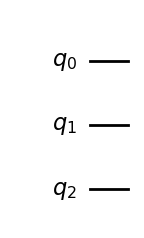

In [18]:
circuit = QuantumCircuit(3)
circuit.draw(output='mpl')

In [19]:
state_vector(circuit)

<IPython.core.display.Latex object>

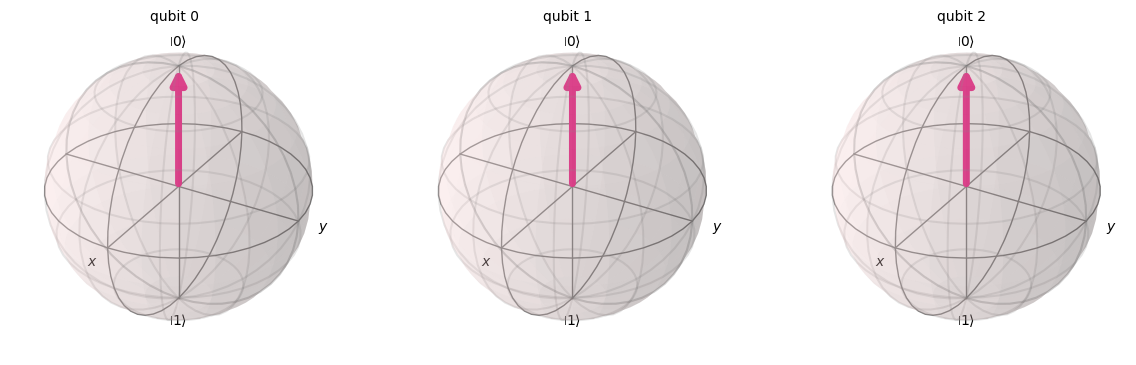

In [20]:
plot_bloch(circuit)

The **CNOT gate**, short for **Controlled-NOT** gate has two input qubits: a control qubit (labeled as *q0*) and a target qubit (labeled as *q1*). The gate flips the state of the target qubit if and only if the control qubit is in the state $|1\rangle$; otherwise, it leaves the target qubit unchanged.
In matrix form, the CNOT gate is represented as:

$\text{CNOT} = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix}$.

The action of the CNOT gate can be described as follows:

*   If the control qubit *q0* is in the state $|0\rangle$, the target qubit *q1* remains unchanged.
*   If the control qubit *q0* is in the state $|1\rangle$, the target qubit *q1* is flipped.


<ipython-input-33-28a23f63f236>:6: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  circuit.cnot(0,2)


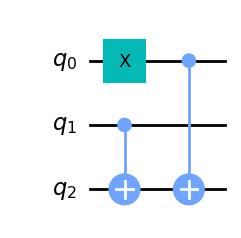

In [33]:
circuit = QuantumCircuit(3)
circuit.x(0)

circuit.cx(1,2)

circuit.cnot(0,2)

circuit.draw(output='mpl')

In [34]:
state_vector(circuit)

<IPython.core.display.Latex object>

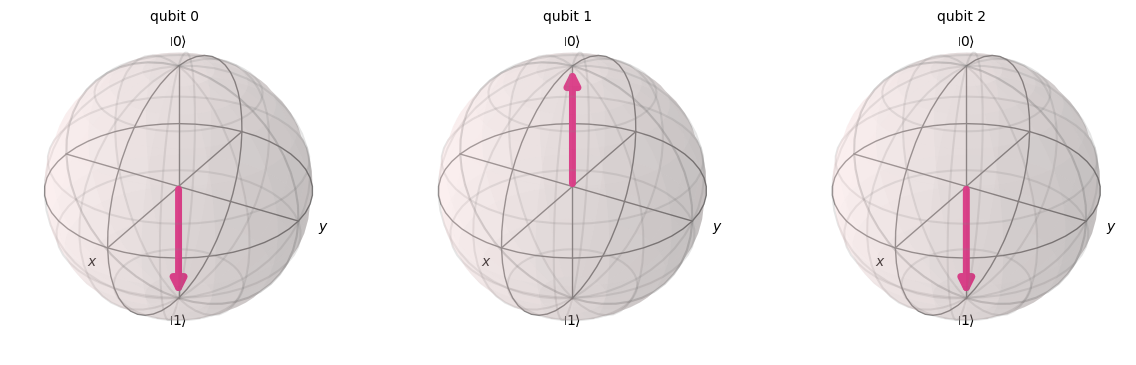

In [35]:
plot_bloch(circuit)

The **Toffoli gate**, often referred to as the **CCNOT** gate performs a classical AND operation. It has two control qubits, labeled as q0 and q1, and one target qubit, labeled as q2. The gate flips the state of the target qubit if and only if both control qubits are in the state $|1\rangle$; otherwise, it leaves the target qubit unchanged.
In other words, the Toffoli gate's action can be summarized as follows:


1.   If both control qubits q0 and q1 are in the state $|1\rangle$, the Toffoli gate flips the state of the target qubit q2.

2.   If either or both of the control qubits q0 and q1 are in the state $|0\rangle$, the Toffoli gate leaves the target qubit q2 unchanged.

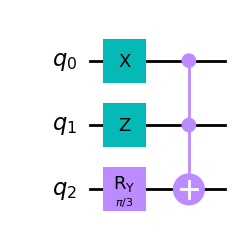

In [53]:
circuit = QuantumCircuit(3)

circuit.x(0)

circuit.z(1)

circuit.ry(pi/3, 2)

circuit.ccx(0,1,2)

circuit.draw(output='mpl')



In [52]:
state_vector(circuit)

<IPython.core.display.Latex object>

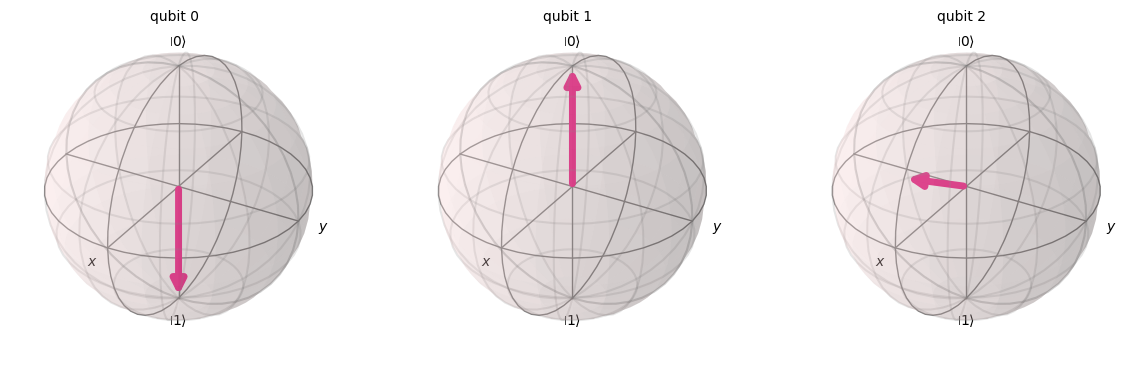

In [54]:
plot_bloch(circuit)

The **SWAP gate** is used to swap the quantum states of two qubits, effectively exchanging the information they carry. The SWAP gate is reversible, meaning that applying it twice returns the qubits to their original states.
In matrix form, the SWAP gate is represented as:
$ \text{SWAP} = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix} $

When applied to two qubits, the SWAP gate exchanges their states. For example, if the initial state of the two qubits is $|q0, q1\rangle$, the SWAP gate transforms it to $|q1, q0\rangle$, effectively swapping the states of the qubits q0 and q1.


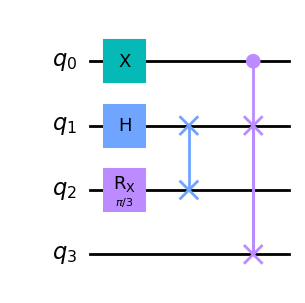

In [81]:
circuit = QuantumCircuit(4)
circuit.x(0)
circuit.h(1)
circuit.rx(pi/3, 2)
circuit.swap(1, 2)
circuit.cswap(0, 1, 3)
circuit.draw(output='mpl')

In [82]:
state_vector(circuit)

<IPython.core.display.Latex object>

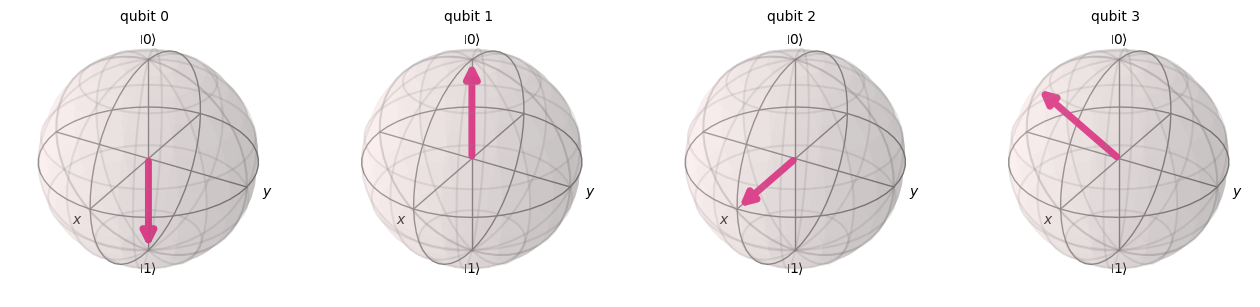

In [83]:
plot_bloch(circuit)

The **Controlled-Phase gate**, often denoted as $CP(\phi)$, is a two-qubit gate that introduces a phase shift on the target qubit based on the state of the control qubit. In matrix form, the Controlled-Phase gate is represented as:

$ CP(\phi) = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & e^{i\phi} \end{bmatrix} $

Here, $\phi$ represents the phase angle that determines the amount of phase shift applied to the target qubit based on the state of the control qubit.
The action of the Controlled-Phase gate can be described as follows:
*   If the control qubit is in the state $|0\rangle$, the gate leaves the target qubit unchanged.

*   If the control qubit is in the state $|1\rangle$, the gate applies a phase shift of $e^{i\phi}$ to the target qubit.

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


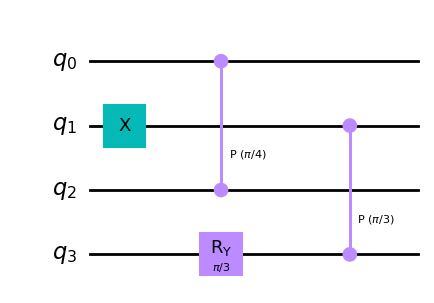

In [99]:
circuit = QuantumCircuit(4)
circuit.x(1)
circuit.cp(pi/4, 0,2)
circuit.ry(pi/3,3)
circuit.cp(pi/3, 1,3)

circuit.draw(output='mpl')

In [100]:
state_vector(circuit)

<IPython.core.display.Latex object>

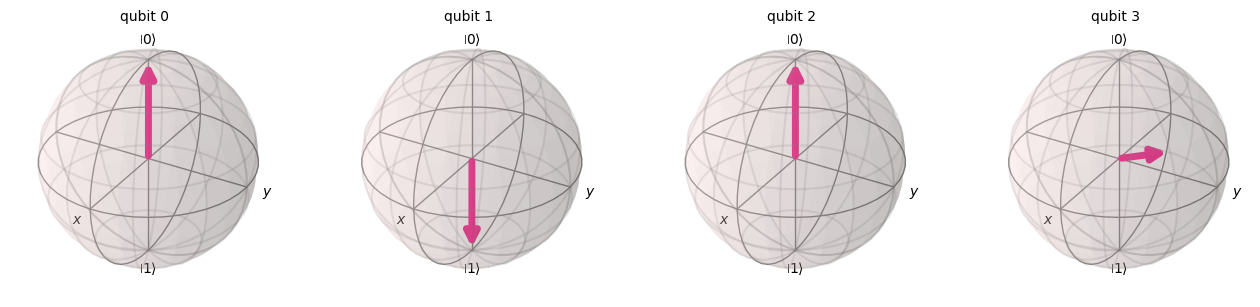

In [101]:
plot_bloch(circuit)